# Comparing Literature Coordinates to XGA Peaks

This notebook is designed to compare the central coordinates presented in literature to those measured by the XGA peak finder, for the samples we are running tests on. This is likely a relatively uninformative test, as we are not interested in calibrating miscentering or anything along those lines, but it may be a useful demonstration of the veracity of the literature coordinates.

## Import Statements

In [1]:
import pandas as pd
import numpy as np
from astropy.units import Quantity
from astropy.cosmology import LambdaCDM, WMAP9
import matplotlib.pyplot as plt

import xga
# This just sets the number of cores this analysis is allowed to use
xga.NUM_CORES = 2
from xga.samples import ClusterSample
from xga.sources import GalaxyCluster

## Loading Sample Colours

Here we load the colour configuration file that controls the colours we associate with each sample

In [2]:
samp_colours = pd.read_csv("samp_plot_colours.csv")

xcs3p_colour = samp_colours[samp_colours['samp_name'] == 'xcs3p'].iloc[0]['samp_colour']
lovisari_colour = samp_colours[samp_colours['samp_name'] == 'lovisari'].iloc[0]['samp_colour']
xxlgc100_colour = samp_colours[samp_colours['samp_name'] == 'xxl'].iloc[0]['samp_colour']
locuss_colour = samp_colours[samp_colours['samp_name'] == 'locuss'].iloc[0]['samp_colour']

## Setting up cosmology

Though three of the previous analyses use the same concordance cosmology, the XXL analysis of their bright cluster sample uses the WMAP9 results, and in case we wish to change anything for an individual sample later we define four separate cosmology objects to pass into our samples.

In [3]:
xcs_cosmo = LambdaCDM(70, 0.3, 0.7)
xxl_cosmo = WMAP9
locuss_cosmo = LambdaCDM(70, 0.3, 0.7)
lovisari_cosmo = LambdaCDM(70, 0.3, 0.7)

## Reading in Sample Files and Declaring XGA ClusterSamples

$\color{red}{\text{NEED TO MENTION/PUBLISH THE OBSIDS THAT WE EXCLUDE FROM USE DUE TO DATA PROBLEMS LIKE FLARING}}$

This subsection involves reading in the sample files of the four test samples (described in [the sample properties notebook](sample_properties.ipynb)), then setting up separate XGA ClusterSample instances (see [the documentation](https://xga.readthedocs.io/en/latest/notebooks/tutorials/sources_samples.html) for an introduction to XGA source and sample objects).

We impose an additional cleaning step on each sample, where we make sure that (for each XMM observation initially associated with a source) at least 70% of a cluster's $R_{500}$ falls on that observation - if this requirement is not met then the observation is excluded. These requirements are set with the `clean_obs=True`, `clean_obs_reg='r500'`, and `clean_obs_threshold=0.7` arguments when a ClusterSample instance is declared.

### SDSSRM-XCS Volume Limited

A sample of clusters selected from the SDSS redMaPPer catalogue and analysed by XCS. This specific sub-sample is volume limited and has percentage temperature uncertainties of less than 25%. Coordinates are X-ray centroids.

In [4]:
xcs3p = pd.read_csv("sample_files/xcs3p_sdssrm_vol_lim_temperr_25%_clusters.csv")

In [5]:
# Reading out the relevant values into arrays just for ease of passing into the ClusterSample object
ra = xcs3p['xapa_ra'].values
dec = xcs3p['xapa_dec'].values
z = xcs3p['z'].values
# Not using the IAU names in XCS_NAME column, its easier for me to use the name based on redMaPPer ID
n = xcs3p['name'].values
# In arcminutes, ClusterSample declaration will convert to kpc using the provided cosmology
r500 = Quantity(xcs3p['r500'].values, 'arcmin')
# Not likely to use richness in this notebook, but I'm putting it in the sample object anyway
r = xcs3p['richness'].values
r_err = xcs3p['richness_err'].values

# Declaring the actual ClusterSample instance for the XCS sample
xcs_srcs = ClusterSample(ra, dec, z, n, r500=r500, richness=r, richness_err=r_err, cosmology=xcs_cosmo, 
                         load_fits=True, use_peak=True, clean_obs=True, clean_obs_reg='r500', 
                         clean_obs_threshold=0.7)

Setting up Galaxy Clusters:   6%|███████████▍                                                                                                                                                                       | 10/157 [00:08<02:01,  1.21it/s]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: SDSSXCS-11331 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:   8%|█████████████▋                                                                                                                                                                     | 12/157 [00:10<02:07,  1.13it/s]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: SDSSXCS-28849 has not been detected in all region files, so generating and fitting products wit

Setting up Galaxy Clusters:  18%|███████████████████████████████▉                                                                                                                                                   | 28/157 [01:26<21:19,  9.92s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: SDSSXCS-12022 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  18%|█████████████████████████████████                                                                                                                                                  | 29/157 [01:32<18:47,  8.81s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:940: UserWarning: SDSSXCS-5977 fit SDSSXCS-5977_ra35.868932_dec-8.868980699999998_ri0.0_ro0.06726641708957767_grpTru

/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: SDSSXCS-21847 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  39%|█████████████████████████████████████████████████████████████████████▌                                                                                                             | 61/157 [03:07<16:21, 10.22s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: SDSSXCS-24235 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  41%|████████████████████████████████████████████████████████

Setting up Galaxy Clusters:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 104/157 [06:12<00:58,  1.10s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: SDSSXCS-457 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 105/157 [06:15<01:19,  1.53s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: SDSSXCS-35 has not been detected in all region files, so generating and fitting products with the

Setting up Galaxy Clusters:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 137/157 [07:51<00:43,  2.20s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: SDSSXCS-487 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 140/157 [07:54<00:23,  1.37s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/extended.py:221: UserWarning: A point source has been detected in 0404190201 and is very close to the user supplied coordinate

### XXL-100-GC

The 100 brightest clusters observed by the XXL survey. An X-ray selected sample as opposed to the SDSSRM-XCS sample. $\color{red}{\text{Coordinates are X-ray centroids.}}$

In [6]:
xxlgc100 = pd.read_csv("sample_files/xxl_gc100.csv")

# Limit the comparison to clusters with a flag of 0 - meaning it is in the main sample of 100 clusters
xxlgc100 = xxlgc100[xxlgc100['Flag'] == 0]

# Excluding a specific cluster which was excluded in the XXL analysis
xxlgc100 = xxlgc100[xxlgc100['XLSSC'] != 504]

In [7]:
# Reading out the relevant values into arrays just for ease of passing into the ClusterSample object
ra = xxlgc100['ra'].values
dec = xxlgc100['dec'].values
z = xxlgc100['z'].values
n = xxlgc100['name'].values
r500 = Quantity(xxlgc100['r500MT'].values, 'Mpc')

# Declaring the actual ClusterSample instance for the XXL sample
# This is the only sample whose original analysis used the WMAP9 cosmology
xxl_srcs = ClusterSample(ra, dec, z, n, r500=r500, cosmology=xxl_cosmo, load_fits=False,
                         use_peak=True, clean_obs=True, clean_obs_reg='r500', clean_obs_threshold=0.7)

Setting up Galaxy Clusters:   0%|                                                                                                                                                                                             | 0/99 [00:00<?, ?it/s]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-94 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:   1%|█▊                                                                                                                                                                                   | 1/99 [00:07<12:54,  7.90s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-96 has not been detected in all region files, so generating and fitting products with the 'reg

Setting up Galaxy Clusters:  13%|███████████████████████▋                                                                                                                                                            | 13/99 [01:48<11:33,  8.06s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-83 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  14%|█████████████████████████▍                                                                                                                                                          | 14/99 [01:53<10:25,  7.35s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-84 has not been detected in all region files, so generating and fitting products with the 'reg

Setting up Galaxy Clusters:  25%|█████████████████████████████████████████████▍                                                                                                                                      | 25/99 [03:42<15:31, 12.59s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-23 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  26%|███████████████████████████████████████████████▎                                                                                                                                    | 26/99 [03:51<14:11, 11.67s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:109: UserWarning: There are 1 alternative matches for observation 0037980101, associated with source XLSSC-6
  warning

Setting up Galaxy Clusters:  37%|███████████████████████████████████████████████████████████████████▎                                                                                                                | 37/99 [07:31<17:47, 17.21s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/extended.py:221: UserWarning: A point source has been detected in 0780450901 and is very close to the user supplied coordinates of XLSSC-11. It will not be excluded from analysis due to the possibility of a mis-identified cool core
  warnings.warn("A point source has been detected in {o} and is very close to the user supplied "
/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/extended.py:221: UserWarning: A point source has been detected in 0109520301 and is very close to the user supplied coordinates of XLSSC-11. It will not be excluded from analysis due to the possibility of a mis-identified cool core
  warnings.warn("A point source has been detected in {o} and is very close to the user 

Setting up Galaxy Clusters:  47%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 47/99 [10:25<12:13, 14.11s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-88 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  48%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                            | 48/99 [10:36<11:12, 13.18s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-87 has not been detected in all region files, so generating and fitting products with the 'reg

Setting up Galaxy Clusters:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 61/99 [12:05<03:27,  5.47s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-518 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 62/99 [12:09<03:11,  5.19s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:109: UserWarning: There are 1 alternative matches for observation 0604873944, associated with source XLSSC-531
  warn

Setting up Galaxy Clusters:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 73/99 [13:22<02:53,  6.67s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-522 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74/99 [13:29<02:44,  6.57s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-533 has not been detected in all region files, so generating and fitting products with the 'r

Setting up Galaxy Clusters:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 85/99 [14:35<01:28,  6.34s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-507 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 86/99 [14:38<01:11,  5.51s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: XLSSC-549 has not been detected in all region files, so generating and fitting products with the 'r

Setting up Galaxy Clusters: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [16:14<00:00,  9.84s/it]


### LoCuSS High-$L_{\rm{X}}$

A sample of 50 high luminosity clusters selected from the ROSAT All-Sky Survey, with follow-up observations from XMM and Chandra. $\color{red}{\text{Coordinates are X-ray peaks??}}$

In [8]:
# Reading the LoCuSS files, making sure that ObsIDs are read in as strings not integers
locuss = pd.read_csv("sample_files/locuss_highlx_clusters.csv", dtype={'chandra_id': str, 'xmm_obsid': str})

In [9]:
# Reading out the relevant values into arrays just for ease of passing into the ClusterSample object
ra = locuss['ra'].values
dec = locuss['dec'].values
z = locuss['z'].values
n = locuss['name'].values
r500 = Quantity(locuss['r500'].values, 'kpc')
r2500 = Quantity(locuss['r2500'].values, 'kpc')

# Declaring the actual ClusterSample instance for the LoCuSS sample
locuss_srcs = ClusterSample(ra, dec, z, n, r500=r500, r2500=r2500, cosmology=locuss_cosmo, load_fits=True, 
                            use_peak=True, clean_obs=True, clean_obs_reg='r500', clean_obs_threshold=0.7)

Declaring BaseSource Sample:  36%|████████████████████████████████████████████████████████████████▍                                                                                                                  | 18/50 [04:11<07:13, 13.56s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/samples/base.py:90: UserWarning: Source ZwCl0949.6+5207 does not appear to have any XMM data, and will not be included in the sample.
  warn("Source {n} does not appear to have any XMM data, and will not be included in the "
Declaring BaseSource Sample:  46%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 23/50 [05:27<07:19, 16.28s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/samples/base.py:90: UserWarning: Source Abell1423 does not appear to have any XMM data, and will not be included in the sample.
  warn("Source {n} does not appear to have any XMM data, and will n

Setting up Galaxy Clusters:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 27/46 [04:15<02:29,  7.88s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: Abell1689 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
Setting up Galaxy Clusters:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 29/46 [04:33<02:22,  8.40s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: Abell1758N has not been detected in all region files, so generating and fitting products with the '

### Planck Selected with XMM follow-up

A sample of 120 galaxy clusters selected from the Planck ESZ catalogue, making sure they are positioned outside of the galactic plane, and selecting only high SZ signal-to-noise objects. The sample file contains original Planck catalogue coordinates as well as XMM-derived X-ray peaks measured by the Lovisari et al. - here we shall use the X-ray coordinates as the starting point.

In [10]:
lovisari = pd.read_csv("sample_files/lovisari_planck_clusters.csv")

In [16]:
# Reading out the relevant values into arrays just for ease of passing into the ClusterSample object
ra = lovisari['xmm_ra'].values
dec = lovisari['xmm_dec'].values
z = lovisari['z'].values
n = lovisari['name'].values
r500 = Quantity(lovisari['r500'].values, 'kpc')

# Declaring the actual ClusterSample instance for the Lovisari sample
lovisari_srcs = ClusterSample(ra, dec, z, n, r500=r500, cosmology=lovisari_cosmo, load_fits=True, use_peak=True, 
                            clean_obs=True, clean_obs_reg='r500', clean_obs_threshold=0.7)

Declaring BaseSource Sample:  50%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 60/120 [06:59<05:30,  5.51s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:794: UserWarning: G226.17-21.91 spectrum /mnt/lustre/projects/astro/general/dt237/mass_papers/XCS-Mass-Paper-I-Analysis/xga_output/0675470101/0675470101_mos2_G226.17-21.91_ra88.262_dec-21.062_ri0.0483332993719956_ro0.05437496179349506_grpTrue_mincnt5_ident72837747_6_spec.fits cannot be loaded in due to a mismatch in available ancillary files
  warnings.warn("{src} spectrum {sp} cannot be loaded in due to a mismatch in available"
Declaring BaseSource Sample:  51%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 61/120 [07:09<06:45,  6.88s/it]/mnt/pact/dt237/

/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:794: UserWarning: G226.24+76.76 spectrum /mnt/lustre/projects/astro/general/dt237/mass_papers/XCS-Mass-Paper-I-Analysis/xga_output/0502690101/0502690101_mos1_G226.24x76.76_ra178.812_dec23.387_ri0.0_ro0.1752082510082009_grpTrue_mincnt5_spec.fits cannot be loaded in due to a mismatch in available ancillary files
  warnings.warn("{src} spectrum {sp} cannot be loaded in due to a mismatch in available"
/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:794: UserWarning: G226.24+76.76 spectrum /mnt/lustre/projects/astro/general/dt237/mass_papers/XCS-Mass-Paper-I-Analysis/xga_output/0502690101/0502690101_mos1_G226.24x76.76_ra178.812_dec23.387_ri0.0_ro0.16191659058688912_grpTrue_mincnt5_spec.fits cannot be loaded in due to a mismatch in available ancillary files
  warnings.warn("{src} spectrum {sp} cannot be loaded in due to a mismatch in available"
/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:794: UserWarni

/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:794: UserWarning: G252.96-56.05 spectrum /mnt/lustre/projects/astro/general/dt237/mass_papers/XCS-Mass-Paper-I-Analysis/xga_output/0105660101/0105660101_mos1_G252.96-56.05_ra49.515_dec-44.263_ri0.0_ro0.2561665126045533_grpTrue_mincnt5_spec.fits cannot be loaded in due to a mismatch in available ancillary files
  warnings.warn("{src} spectrum {sp} cannot be loaded in due to a mismatch in available"
Setting up Galaxy Clusters:   0%|                                                                                                                                                                                            | 0/120 [00:00<?, ?it/s]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:963: UserWarning: A previous annular spectra profile fit for G000.44-41.83 was not successful, or no matching spectrum has been loaded, so it cannot be read in
  warnings.warn("A previous annular spectra profile fit for {src} was no

Setting up Galaxy Clusters:  22%|██████████████████████████████████████▊                                                                                                                                            | 26/120 [05:59<20:10, 12.88s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:963: UserWarning: A previous annular spectra profile fit for G072.63+41.46 was not successful, or no matching spectrum has been loaded, so it cannot be read in
  warnings.warn("A previous annular spectra profile fit for {src} was not successful, or no "
/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: G072.63+41.46 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:963: UserWarning: A previous annular spectra p

Setting up Galaxy Clusters:  40%|███████████████████████████████████████████████████████████████████████▌                                                                                                           | 48/120 [09:32<11:16,  9.40s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:940: UserWarning: G164.18-38.89 fit G164.18-38.89_ra44.740717630253435_dec13.587693396258224_ri0.19574984170276016_ro0.20179150348370956_grpTrue_mincnt5_ident20760763_32_constant*tbabs*apec.fits could not be loaded in as there are no matching spectra available
  warnings.warn("{src} fit {f} could not be loaded in as there are no matching spectra "
/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:940: UserWarning: G164.18-38.89 fit G164.18-38.89_ra44.740717630253435_dec13.587693396258224_ri0.08579159728948131_ro0.0918332590704307_grpTrue_mincnt5_ident20760763_14_constant*tbabs*apec.fits could not be loaded in as there are no matching spectra available
  warnings.warn("{src} 

/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/general.py:124: UserWarning: G164.18-38.89 has not been detected in all region files, so generating and fitting products with the 'region' reg_type will not use all available data
  warnings.warn("{n} has not been detected in all region files, so generating and fitting products"
/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:940: UserWarning: G164.18-38.89 fit G164.18-38.89_ra44.740717630253435_dec13.587693396258224_ri0.19574984170276016_ro0.20179150348370956_grpTrue_mincnt5_ident20760763_32_constant*tbabs*apec.fits could not be loaded in as there are no matching spectra available
  warnings.warn("{src} fit {f} could not be loaded in as there are no matching spectra "
/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:940: UserWarning: G164.18-38.89 fit G164.18-38.89_ra44.740717630253435_dec13.587693396258224_ri0.08579159728948131_ro0.0918332590704307_grpTrue_mincnt5_ident20760763_14_constant*tbabs*apec.fits c

Setting up Galaxy Clusters:  41%|█████████████████████████████████████████████████████████████████████████                                                                                                          | 49/120 [09:36<09:27,  7.99s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:963: UserWarning: A previous annular spectra profile fit for G166.13+43.39 was not successful, or no matching spectrum has been loaded, so it cannot be read in
  warnings.warn("A previous annular spectra profile fit for {src} was not successful, or no "
Setting up Galaxy Clusters:  42%|████████████████████████████████████████████████████████████████████████████                                                                                                       | 51/120 [09:51<08:51,  7.71s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:963: UserWarning: A previous annular spectra profile fit for G171.94-40.65 was not successful, or no matching spectrum has been loaded

/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:794: UserWarning: G226.24+76.76 spectrum /mnt/lustre/projects/astro/general/dt237/mass_papers/XCS-Mass-Paper-I-Analysis/xga_output/0502690201/0502690201_mos1_G226.24x76.76_ra178.812_dec23.387_ri0.0_ro0.16191659058688912_grpTrue_mincnt5_spec.fits cannot be loaded in due to a mismatch in available ancillary files
  warnings.warn("{src} spectrum {sp} cannot be loaded in due to a mismatch in available"
/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:794: UserWarning: G226.24+76.76 spectrum /mnt/lustre/projects/astro/general/dt237/mass_papers/XCS-Mass-Paper-I-Analysis/xga_output/0551280101/0551280101_pn_G226.24x76.76_ra178.812_dec23.387_ri0.0_ro0.1752082510082009_grpTrue_mincnt5_spec.fits cannot be loaded in due to a mismatch in available ancillary files
  warnings.warn("{src} spectrum {sp} cannot be loaded in due to a mismatch in available"
/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:794: UserWarning

/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:794: UserWarning: G226.24+76.76 spectrum /mnt/lustre/projects/astro/general/dt237/mass_papers/XCS-Mass-Paper-I-Analysis/xga_output/0112230501/0112230501_mos1_G226.24x76.76_ra178.812_dec23.387_ri0.0_ro0.1752082510082009_grpTrue_mincnt5_spec.fits cannot be loaded in due to a mismatch in available ancillary files
  warnings.warn("{src} spectrum {sp} cannot be loaded in due to a mismatch in available"
Setting up Galaxy Clusters:  52%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                     | 63/120 [12:13<13:49, 14.55s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:963: UserWarning: A previous annular spectra profile fit for G228.49+53.12 was not successful, or no matching spectrum has been loaded, so it cannot be read in
  warnings.warn("A previous annular spectra profile fit for {src} was no

Setting up Galaxy Clusters:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 82/120 [14:56<05:12,  8.21s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:963: UserWarning: A previous annular spectra profile fit for G263.16-23.41 was not successful, or no matching spectrum has been loaded, so it cannot be read in
  warnings.warn("A previous annular spectra profile fit for {src} was not successful, or no "
Setting up Galaxy Clusters:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 84/120 [15:24<07:08, 11.90s/it]/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:963: UserWarning: A previous annular spectra profile fit for G266.03-21.25 was not successful, or no matching spectrum has been loaded

## Calculating Offset Between XGA Peak and Literature Coordinates

Here we compare the X-ray peak coordinates measured by XGA to those coordinates in the original sample files. This information may become redundant as we will eyeball all of the clusters anyway, to check there are no problems with our region matching or peak positions, but it will give an indication of how different the coordinates are at least.

### Offsets in kpc

We use a method built into XGA source objects (offset) to measure the distance between the original user supplied coordinates (whatever was in the sample file we used to declare the XGA sample), and the peak measured by XGA. In this instance (as we have defined a cosmology, and have knowledge of the redshifts of the objects) we choose to measure the offset distance in kpc.

$\color{red}{\text{It is important to note that if peak finding fails to converge, the peak value will currently be set to the same user supplied coordinates - in retrospect that seems silly}}$

In [17]:
# Just use list comprehensions to loop through the sources in a sample and calculate offset
xcs_kpc_offsets = Quantity([s.offset('kpc') for s in xcs_srcs])
xxl_kpc_offsets = Quantity([s.offset('kpc') for s in xxl_srcs])
loc_kpc_offsets = Quantity([s.offset('kpc') for s in locuss_srcs])
lov_kpc_offsets = Quantity([s.offset('kpc') for s in lovisari_srcs])

Here we print the minimum and maxmimum separation values measured for the four different samples:

In [18]:
print("The minimum and maximum offsets for the SDSSRM-XCS sample are {l} kpc and {u} kpc "\
      "respectively\n".format(l=xcs_kpc_offsets.min().value.round(2), u=xcs_kpc_offsets.max().value.round(2)))
print("The minimum and maximum offsets for the XXL sample are {l} kpc and {u} kpc "\
      "respectively\n".format(l=xxl_kpc_offsets.min().value.round(2), u=xxl_kpc_offsets.max().value.round(2)))
print("The minimum and maximum offsets for the LoCuSS sample are {l} kpc and {u} kpc "\
      "respectively\n".format(l=loc_kpc_offsets.min().value.round(2), u=loc_kpc_offsets.max().value.round(2)))
print("The minimum and maximum offsets for the Lovisari et al. sample are {l} kpc and {u} kpc "\
      "respectively\n".format(l=lov_kpc_offsets.min().value.round(2), u=lov_kpc_offsets.max().value.round(2)))

The minimum and maximum offsets for the SDSSRM-XCS sample are 1.52 kpc and 401.43 kpc respectively

The minimum and maximum offsets for the XXL sample are 0.0 kpc and 872.17 kpc respectively

The minimum and maximum offsets for the LoCuSS sample are 0.42 kpc and 299.28 kpc respectively

The minimum and maximum offsets for the Lovisari et al. sample are 0.97 kpc and 1402.57 kpc respectively



Setting up bins to cover the approximate range of offsets demonstrated by the minimum and maximum values above:

In [19]:
offset_bins = np.logspace(-0.5, 3.6, 20)

Now we visualise the offset distributions of the different samples as a histogram, using the same bins for every sample:

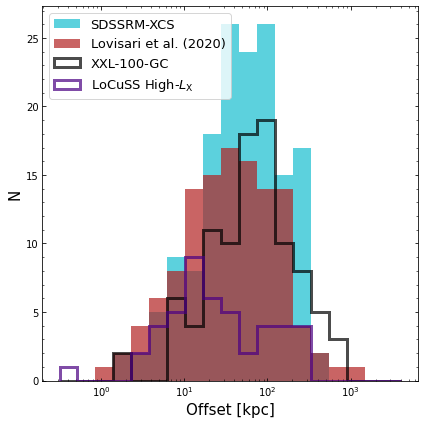

In [20]:
# Setting up the figure object, with minorticks on (as well as inward facing ticks, and ticks on the 
#  upper and right hand axes)
plt.figure(figsize=(6, 6))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

# Adding the histograms, using the previously defined bins, and the sample colours as imported 
#  earlier in the notebook
plt.hist(xcs_kpc_offsets.value, bins=offset_bins, color=xcs3p_colour, alpha=0.7, histtype='stepfilled', 
         label=r"SDSSRM-XCS", linewidth=3)
plt.hist(lov_kpc_offsets.value, bins=offset_bins, color=lovisari_colour, alpha=0.7, histtype='stepfilled', 
         label=r"Lovisari et al. (2020)", linewidth=3)
plt.hist(xxl_kpc_offsets.value, bins=offset_bins, color=xxlgc100_colour, alpha=0.7, histtype='step', 
         label=r"XXL-100-GC", linewidth=3)
plt.hist(loc_kpc_offsets.value, bins=offset_bins, color=locuss_colour, alpha=0.7, histtype='step', 
         label=r"LoCuSS High-$L_{\rm{X}}$", linewidth=3)

plt.ylabel("N", fontsize=15)
plt.xlabel(r"Offset [kpc]", fontsize=15)

plt.xscale('log')
plt.legend(fontsize=13, loc=2)
plt.tight_layout()

# Saving the offset plot
plt.savefig("non_paper_figures/samps_kpc_offset.pdf")
plt.show()